# Data processing

Uploading needed packages

In [1]:
import pandas as pd
import numpy as np
import sklearn
import sys
import matplotlib
import seaborn as sns
import doubleml as dml

print('System Version:', sys.version)
!python --version
print('numpy:', np.__version__)
print('pandas:', pd.__version__)
print('sklearn:', sklearn.__version__)
print('seaborn:', sns.__version__)
print('matplotlib:', matplotlib.__version__)
print('doubleml:', dml.__version__)

System Version: 3.8.8 (default, Apr 13 2021, 12:59:45) 
[Clang 10.0.0 ]
Python 3.8.8
numpy: 1.20.1
pandas: 1.2.4
sklearn: 0.24.1
seaborn: 0.11.1
matplotlib: 3.3.4
doubleml: 0.5.0


In [2]:
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from matplotlib import pyplot as plt


from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer


#from sklearn.preprocessing import OrdinalEncoder


Reading needed databases by year and adding a year variable

In [3]:
#When Working on Windows

#df1 = pd.DataFrame(pd.read_spss('C:/Users/ricar/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2010.sav', convert_categoricals = False))
#df1['year']= 2010
#df2 = pd.DataFrame(pd.read_spss('C:/Users/ricar/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2011.sav', convert_categoricals = False))
#df2['year']= 2011
#df3 = pd.DataFrame(pd.read_spss('C:/Users/ricar/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2012.sav', convert_categoricals = False))
#df3['year']= 2012
#df4 = pd.DataFrame(pd.read_spss('C:/Users/ricar/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2013.sav', convert_categoricals = False))
#df4['year']= 2013
#df5 = pd.DataFrame(pd.read_spss('C:/Users/ricar/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2014.sav', convert_categoricals = False))
#df5['year']= 2014


#df6 = pd.DataFrame(pd.read_spss('C:/Users/ricar/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2015.sav', convert_categoricals = True))
#df6['year']= 2015
#df7 = pd.DataFrame(pd.read_spss('C:/Users/ricar/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2016.sav', convert_categoricals = True))
#df7['year']= 2016
#df8 = pd.DataFrame(pd.read_spss('C:/Users/ricar/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2017.sav', convert_categoricals = True))
#df8['year']= 2017
#df9 = pd.DataFrame(pd.read_spss('C:/Users/ricar/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2018.sav', convert_categoricals = True))
#df9['year']= 2018
#df10 = pd.DataFrame(pd.read_spss('C:/Users/ricar/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2019.sav', convert_categoricals = True))
#df10['year']= 2019
#df11 = pd.DataFrame(pd.read_spss('C:/Users/ricar/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2020.sav', convert_categoricals = False))
#df11['year']= 2020



## Uploading data

In [4]:
#When working on the macbook
df1 = pd.DataFrame(pd.read_spss('/Users/rmurillo/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2010.sav', convert_categoricals = False))
df1['year']= 2010
df1['imas']= df1['a8']
df1['imas'].replace(3,4)
df1['cond_aseg']= df1['a10']
df1['asist_educ'] = df1['a14']
df1['ult_aaprob'] = df1['a15']
df1['ForNoReg'] = df1['CarEspNoReg']
df1['A10A'] = df1['a9a']
df1['A10B'] = df1['a9b']
df1['A10C'] = df1['a9c']
df1['f6'] = df1['f4']
df1['f7']= df1['f5']
df1['g5']= df1['g4d']
df1['h2a']= df1['h1a']
df1['h2b']= df1['h1b']
df1['hhid']= df1['HOGAR']*100 +df1['CUESTIONARIO']*1000+df1['SEGMENTO']*100000+df1['year']*1000000000

df1= df1.drop(['CarEspNoReg', 'a15', 'a14', 'a10', 'a8', 'a9a', 'a9b', 'a9c', 'd13c', 'd13c1', 'd13d', 'd13e', 'd15a', 'd15b', 'd15c', 'f4', 'f5', 'g4d', 'h2a','h2b'], axis=1)

df2 =  pd.DataFrame(pd.read_spss('/Users/rmurillo/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2011.sav', convert_categoricals = False))
df2['year']= 2011
df2['imas']= df2['A8']
df2['imas'].replace(3,4)
df2['cond_aseg']= df2['A11']
df2['asist_educ'] = df2['A13']
df2['ult_aaprob'] = df2['A14']
df2['hhid']= df2['HOGAR']*100 +df2['CUESTIONARIO']*1000+df2['SEGMENTO']*100000+df2['year']*1000000000


df3 = pd.DataFrame(pd.read_spss('/Users/rmurillo/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2012.sav', convert_categoricals = False))
df3['year']= 2012
df3['imas']= df3['A8']
df3['imas'].replace(3,4)
df3['cond_aseg']= df3['A11']
df3['asist_educ'] = df3['A13']
df3['ult_aaprob'] = df3['A14']
df3['hhid']= df3['HOGAR']*100 +df3['CUESTIONARIO']*1000+df3['SEGMENTO']*100000+df3['year']*1000000000

df4 =  pd.DataFrame(pd.read_spss('/Users/rmurillo/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2013.sav', convert_categoricals = False))
df4['year']= 2013
df4['imas']= df4['A9A']
df4['imas'].replace(3,4)
df4['cond_aseg']= df4['A11']
df4['asist_educ'] = df4['A13']
df4['ult_aaprob'] = df4['A14']
df4['hhid']= df4['HOGAR']*100 +df4['CUESTIONARIO']*1000+df4['SEGMENTO']*100000+df4['year']*1000000000


df5 =  pd.DataFrame(pd.read_spss('/Users/rmurillo/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2014.sav', convert_categoricals = False))
df5['year']= 2014
df5['imas']= df5['A9A']
df5['imas'].replace(3,4)
df5['cond_aseg']= df5['A11']
df5['asist_educ'] = df5['A13']
df5['ult_aaprob'] = df5['A14']
df5['hhid']= df5['HOGAR']*100 +df5['CUESTIONARIO']*1000+df5['SEGMENTO']*100000+df5['year']*1000000000


df6 =  pd.DataFrame(pd.read_spss('/Users/rmurillo/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2015.sav', convert_categoricals = False))
df6['year']= 2015
df6['imas']= df6['A9A']
df6['cond_aseg']= df6['A11']
df6['asist_educ'] = df6['A13']
df6['ult_aaprob'] = df6['A14']
df6['hhid']= df6['HOGAR']*100 +df6['CUESTIONARIO']*1000+df6['UPM']*100000+df6['year']*1000000000

df7 =  pd.DataFrame(pd.read_spss('/Users/rmurillo/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2016.sav', convert_categoricals = False))
df7['year']= 2016
df7['imas']= df7['A9A']
df7['cond_aseg']= df7['A11']
df7['asist_educ'] = df7['A13']
df7['ult_aaprob'] = df7['A14']
df7['hhid']= df7['HOGAR']*100 +df7['CUESTIONARIO']*1000+df7['UPM']*100000+df7['year']*1000000000

df8 =  pd.DataFrame(pd.read_spss('/Users/rmurillo/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2017.sav', convert_categoricals = False))
df8['year']= 2017
df8['imas']= df8['A9A']
df8['cond_aseg']= df8['A11']
df8['asist_educ'] = df8['A13']
df8['ult_aaprob'] = df8['A14']
df8['hhid']= df8['HOGAR']*100 +df8['CUESTIONARIO']*1000+df8['UPM']*100000+df8['year']*1000000000

df9 =  pd.DataFrame(pd.read_spss('/Users/rmurillo/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2018.sav', convert_categoricals = False))
df9['year']= 2018
df9['imas']= df9['A9A']
df9['cond_aseg']= df9['A11']
df9['asist_educ'] = df9['A13']
df9['ult_aaprob'] = df9['A14']
df9['hhid']= df9['HOGAR']*100 +df9['CUESTIONARIO']*1000+df9['UPM']*100000+df9['year']*1000000000

df10 =  pd.DataFrame(pd.read_spss('/Users/rmurillo/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2019.sav', convert_categoricals = False))
df10['year']= 2019
df10['imas']= df10['A9A']
df10['cond_aseg']= df10['A11']
df10['asist_educ'] = df10['A13']
df10['ult_aaprob'] = df10['A14']
df10['hhid']= df10['HOGAR']*100 +df10['CUESTIONARIO']*1000+df10['UPM']*100000+df10['year']*1000000000

df11 =  pd.DataFrame(pd.read_spss('/Users/rmurillo/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2020.sav', convert_categoricals = False))
df11['year']= 2020
df11['imas']= df11['A9A']
df11['cond_aseg']= df11['A11']
df11['asist_educ'] = df11['A13']
df11['ult_aaprob'] = df11['A14']
df11['hhid']= df11['HOGAR']*100 +df11['CUESTIONARIO']*1000+df11['UPM']*100000+df11['year']*1000000000



## Getting Label dataset for accurate dtypes

We upload the dataset with the convert_categorical = False because when converting we convert the column types to int64 wrongfully, so this is to later replace the dtypes.  

In [5]:
#When working on the macbook
df1_l = pd.DataFrame(pd.read_spss('/Users/rmurillo/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2010.sav', convert_categoricals = True))
df1_l['year']= 2010
df1_l['imas']= df1_l['a8']
df1_l['cond_aseg']= df1_l['a10']
df1_l['asist_educ'] = df1_l['a14']
df1_l['ult_aaprob'] = df1_l['a15']
df1_l['ForNoReg'] = df1_l['CarEspNoReg']
df1_l['A10A'] = df1_l['a9a']
df1_l['A10B'] = df1_l['a9b']
df1_l['A10C'] = df1_l['a9c']
df1_l['f6'] = df1_l['f4']
df1_l['f7']= df1_l['f5']
df1_l['g5']= df1_l['g4d']
df1_l['h2a']= df1_l['h1a']
df1_l['h2b']= df1_l['h1b']
df1_l['hhid']= df1_l['HOGAR']*100 +df1_l['CUESTIONARIO']*1000+df1_l['SEGMENTO']*100000+df1_l['year']*1000000000

df1_l= df1_l.drop(['CarEspNoReg', 'a15', 'a14', 'a10', 'a8', 'a9a', 'a9b', 'a9c', 'd13c', 'd13c1', 'd13d', 'd13e', 'd15a', 'd15b', 'd15c', 'f4', 'f5', 'g4d', 'h2a','h2b'], axis=1)

df2_l =  pd.DataFrame(pd.read_spss('/Users/rmurillo/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2011.sav', convert_categoricals = True))
df2_l['year']= 2011
df2_l['imas']= df2_l['A8']
df2_l['cond_aseg']= df2_l['A11']
df2_l['asist_educ'] = df2_l['A13']
df2_l['ult_aaprob'] = df2_l['A14']
df2_l['hhid']= df2_l['HOGAR']*100 +df2_l['CUESTIONARIO']*1000+df2_l['SEGMENTO']*100000+df2_l['year']*1000000000


df3_l = pd.DataFrame(pd.read_spss('/Users/rmurillo/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2012.sav', convert_categoricals = True))
df3_l['year']= 2012
df3_l['imas']= df3_l['A8']
df3_l['cond_aseg']= df3_l['A11']
df3_l['asist_educ'] = df3_l['A13']
df3_l['ult_aaprob'] = df3_l['A14']
df3_l['hhid']= df3_l['HOGAR']*100 +df3_l['CUESTIONARIO']*1000+df3_l['SEGMENTO']*100000+df3_l['year']*1000000000

df4_l =  pd.DataFrame(pd.read_spss('/Users/rmurillo/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2013.sav', convert_categoricals = True))
df4_l['year']= 2013
df4_l['imas']= df4_l['A9A']
df4_l['cond_aseg']= df4_l['A11']
df4_l['asist_educ'] = df4_l['A13']
df4_l['ult_aaprob'] = df4_l['A14']
df4_l['hhid']= df4_l['HOGAR']*100 +df4_l['CUESTIONARIO']*1000+df4_l['SEGMENTO']*100000+df4_l['year']*1000000000


df5_l =  pd.DataFrame(pd.read_spss('/Users/rmurillo/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2014.sav', convert_categoricals = True))
df5_l['year']= 2014
df5_l['imas']= df5_l['A9A']
df5_l['cond_aseg']= df5_l['A11']
df5_l['asist_educ'] = df5_l['A13']
df5_l['ult_aaprob'] = df5_l['A14']
df5_l['hhid']= df5_l['HOGAR']*100 +df5_l['CUESTIONARIO']*1000+df5_l['SEGMENTO']*100000+df5_l['year']*1000000000


df6_l =  pd.DataFrame(pd.read_spss('/Users/rmurillo/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2015.sav', convert_categoricals = True))
df6_l['year']= 2015
df6_l['imas']= df6_l['A9A']
df6_l['cond_aseg']= df6_l['A11']
df6_l['asist_educ'] = df6_l['A13']
df6_l['ult_aaprob'] = df6_l['A14']
df6_l['hhid']= df6_l['HOGAR']*100 +df6_l['CUESTIONARIO']*1000+df6_l['UPM']*100000+df6_l['year']*1000000000

df7_l =  pd.DataFrame(pd.read_spss('/Users/rmurillo/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2016.sav', convert_categoricals = True))
df7_l['year']= 2016
df7_l['imas']= df7_l['A9A']
df7_l['cond_aseg']= df7_l['A11']
df7_l['asist_educ'] = df7_l['A13']
df7_l['ult_aaprob'] = df7_l['A14']
df7_l['hhid']= df7_l['HOGAR']*100 +df7_l['CUESTIONARIO']*1000+df7_l['UPM']*100000+df7_l['year']*1000000000

df8_l =  pd.DataFrame(pd.read_spss('/Users/rmurillo/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2017.sav', convert_categoricals = True))
df8_l['year']= 2017
df8_l['imas']= df8_l['A9A']
df8_l['cond_aseg']= df8_l['A11']
df8_l['asist_educ'] = df8_l['A13']
df8_l['ult_aaprob'] = df8_l['A14']
df8_l['hhid']= df8_l['HOGAR']*100 +df8_l['CUESTIONARIO']*1000+df8_l['UPM']*100000+df8_l['year']*1000000000

df9_l =  pd.DataFrame(pd.read_spss('/Users/rmurillo/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2018.sav', convert_categoricals = True))
df9_l['year']= 2018
df9_l['imas']= df9_l['A9A']
df9_l['cond_aseg']= df9_l['A11']
df9_l['asist_educ'] = df9_l['A13']
df9_l['ult_aaprob'] = df9_l['A14']
df9_l['hhid']= df9_l['HOGAR']*100 +df9_l['CUESTIONARIO']*1000+df9_l['UPM']*100000+df9_l['year']*1000000000

df10_l =  pd.DataFrame(pd.read_spss('/Users/rmurillo/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2019.sav', convert_categoricals = True))
df10_l['year']= 2019
df10_l['imas']= df10_l['A9A']
df10_l['cond_aseg']= df10_l['A11']
df10_l['asist_educ'] = df10_l['A13']
df10_l['ult_aaprob'] = df10_l['A14']
df10_l['hhid']= df10_l['HOGAR']*100 +df10_l['CUESTIONARIO']*1000+df10_l['UPM']*100000+df10_l['year']*1000000000

df11_l =  pd.DataFrame(pd.read_spss('/Users/rmurillo/Dropbox/Dropbox/UNIMI/THESIS/DB/ENAHO 2020.sav', convert_categoricals = True))
df11_l['year']= 2020
df11_l['imas']= df11_l['A9A']
df11_l['cond_aseg']= df11_l['A11']
df11_l['asist_educ'] = df11_l['A13']
df11_l['ult_aaprob'] = df11_l['A14']
df11_l['hhid']= df11_l['HOGAR']*100 +df11_l['CUESTIONARIO']*1000+df11_l['UPM']*100000+df11_l['year']*1000000000

## Getting number of columns for each dataset year

In here we are not counting new variables added, that is why we are substracting 2 because the year and the hhid columns created, the other ones are direct replacements to other variables. 

In [6]:
print(len(df1.columns), len(df2.columns),len(df3.columns),len(df4.columns),len(df5.columns),len(df6.columns),len(df7.columns),len(df8.columns),len(df9.columns),len(df10.columns),len(df11.columns))

485 510 523 521 539 563 576 579 571 572 625


## Lower Casing Data Columns

We need to lower case to avoid non column matching due to capitalization. 

In [7]:
df1.columns= df1.columns.str.lower()
df2.columns= df2.columns.str.lower()
df3.columns= df3.columns.str.lower()
df4.columns= df4.columns.str.lower()
df5.columns= df5.columns.str.lower()
df6.columns= df6.columns.str.lower()
df7.columns= df7.columns.str.lower()
df8.columns= df8.columns.str.lower()
df9.columns= df9.columns.str.lower()
df10.columns= df10.columns.str.lower()
df11.columns= df11.columns.str.lower()


In [8]:
df1_l.columns= df1_l.columns.str.lower()
df2_l.columns= df2_l.columns.str.lower()
df3_l.columns= df3_l.columns.str.lower()
df4_l.columns= df4_l.columns.str.lower()
df5_l.columns= df5_l.columns.str.lower()
df6_l.columns= df6_l.columns.str.lower()
df7_l.columns= df7_l.columns.str.lower()
df8_l.columns= df8_l.columns.str.lower()
df9_l.columns= df9_l.columns.str.lower()
df10_l.columns= df10_l.columns.str.lower()
df11_l.columns= df11_l.columns.str.lower()

## Building Counts Table

In [9]:
tabla = pd.DataFrame({'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, ],
                        'Housholds':[len(df1[df1['linea']==1]),len(df2[df2['linea']==1]),len(df3[df3['linea']==1]),len(df4[df4['linea']==1]),len(df5[df5['linea']==1]),len(df6[df6['linea']==1]),len(df7[df7['linea']==1]),len(df8[df8['linea']==1]),len(df9[df9['linea']==1]),len(df10[df10['linea']==1]),len(df11[df11['linea']==1])],
                          'Persons':[len(df1),len(df2),len(df3),len(df4),len(df5),len(df6),len(df7),len(df8),len(df9),len(df10),len(df11)],
                              '12-17 year olds': [len(df1[(df1['a5']<18) & (df1['a5']>11)]),len(df2[(df2['a5']<18) & (df2['a5']>11)]),len(df3[(df3['a5']<18) & (df3['a5']>11)]),len(df4[(df4['a5']<18) & (df4['a5']>11)]),len(df5[(df5['a5']<18) & (df5['a5']>11)]),len(df6[(df6['a5']<18) & (df6['a5']>11)]),len(df7[(df7['a5']<18) & (df7['a5']>11)]),len(df8[(df8['a5']<18) & (df8['a5']>11)]),len(df9[(df9['a5']<18) & (df9['a5']>11)]),len(df10[(df10['a5']<18) & (df10['a5']>11)]),len(df11[(df11['a5']<18) & (df11['a5']>11)])],
                                'Avancemos' : [len(df1[(df1['a5']<17) & (df1['a5']>11) & (df1['imas']==1)]),len(df2[(df2['a5']<17) & (df2['a5']>11) & (df2['imas']==1)]),len(df3[(df3['a5']<18) & (df3['a5']>11) & (df3['imas']==1)]),len(df4[(df4['a5']<18) & (df4['a5']>11) & (df4['imas']==1)]),len(df5[(df5['a5']<18) & (df5['a5']>11) & (df5['imas']==1)]),len(df6[(df6['a5']<18) & (df6['a5']>11) & (df6['imas']==1)]),len(df7[(df7['a5']<18) & (df7['a5']>11) & (df7['imas']==1)]),len(df8[(df8['a5']<18) & (df8['a5']>11) & (df8['imas']==1)]),len(df9[(df9['a5']<18) & (df9['a5']>11) & (df9['imas']==1)]),len(df10[(df10['a5']<18) & (df10['a5']>11) & (df10['imas']==1)]),len(df11[(df11['a5']<18) & (df11['a5']>11) & (df11['imas']==1)])]
                     })
tabla

,Year,Housholds,Persons,12-17 year olds,Avancemos
0,2010,11603,41184,5071,1062
1,2011,11721,40860,4979,1049
2,2012,11374,39390,4597,1172
3,2013,11219,38779,4469,1189
4,2014,11405,38399,4189,1094
5,2015,11277,37291,3706,843
6,2016,11335,37006,3686,853
7,2017,10712,34843,3508,848
8,2018,10942,35096,3387,898
9,2019,11006,34863,3255,796


## Getting Common columns for all datasets 

By earlier dropping columns when the upload of the dataset was done, we assure they are not present in this intersection. 

In [10]:
n1= set(df1.columns)
n2= set(df2.columns)
n3= set(df3.columns)
n4= set(df4.columns)
n5= set(df5.columns)
n6= set(df6.columns)
n7= set(df7.columns)
n8= set(df8.columns)
n9= set(df9.columns)
n10= set(df10.columns)
n11= set(df11.columns)


n= n1.intersection(n2, n3, n4, n5, n6, n7, n8, n9, n10, n11)


In [11]:
n1_l= set(df1_l.columns)
n2_l= set(df2_l.columns)
n3_l= set(df3_l.columns)
n4_l= set(df4_l.columns)
n5_l= set(df5_l.columns)
n6_l= set(df6_l.columns)
n7_l= set(df7_l.columns)
n8_l= set(df8_l.columns)
n9_l= set(df9_l.columns)
n10_l= set(df10_l.columns)
n11_l= set(df11_l.columns)


n_l= n1_l.intersection(n2_l, n3_l, n4_l, n5_l, n6_l, n7_l, n8_l, n9_l, n10_l, n11_l)

Just checking everything is fine

In [12]:
print(len(n),len(n_l))

377 377


## Append data only from the common columns

In [13]:
df= df1[n].append(df2[n].append(df3[n].append(df4[n].append(df5[n].append(df6[n].append(df7[n].append(df8[n].append(df9[n].append(df10[n].append(df11[n]))))))))))
df_l= df1_l[n_l].append(df2_l[n_l].append(df3_l[n_l].append(df4_l[n_l].append(df5_l[n_l].append(df6_l[n_l].append(df7_l[n_l].append(df8_l[n_l].append(df9_l[n_l].append(df10_l[n_l].append(df11_l[n_l]))))))))))


Again, checking if everything went fine. 

In [14]:
print(len(df.columns), len(df_l.columns))

377 377


## Getting object columns


This variable 'a5' which represents age has a bit of a tricky handling, since it is bassicaly an integer, but with semi ignored categories which are:
- 97 years old or more. 
- 97 years old or more (written diferently). 
- More than 15 years old with ignored age. 
- More than 12 years old with ignored age. 
- Less than a year. 
- Less than a year (written diferently). 

In the df dataset, there is no problem with this, since this ignored codes are coded with numbers that are either 0 or more than 97,but since we are filtering only for the group from 12 to 17, there is not problem with them. 
What it is necessary to do is that since in the df_l dataset, this column will be an object, to remove it from the object types we will pass. 


In [15]:
object_columns_l = set((df_l.drop('a5', axis= 1)).select_dtypes(include='object').columns)

len(object_columns_l)


278

This extra object columns, are columns that are classified as int64, but in reality they are object, so we create a set to add manually aftwards. 

In [16]:
object_columns_extra = set(df[['d_reg_ipcn', 'd_zon_ipcn','lp','q_zon_ipcn','q_reg_ipcn','cba']].columns)
len(object_columns_extra)

6

In [17]:
object_columns = object_columns_l.union(object_columns_extra)
len(object_columns)

284

## Transforming Columns into objects

In [18]:
for col in object_columns:
    df[col] = df[col].astype('category')

Checking that dtype transformation went fine 

In [19]:
print(df.info(verbose= True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403241 entries, 0 to 25529
Data columns (total 377 columns):
 #    Column          Dtype   
---   ------          -----   
 0    ipbh            float64 
 1    ipim            float64 
 2    itpb            float64 
 3    a4              category
 4    snab            float64 
 5    hornorsec       category
 6    v18j            category
 7    e14b2           category
 8    cond_aseg       category
 9    v18g            category
 10   ipsmb           float64 
 11   h3a             category
 12   g6              category
 13   itbh            float64 
 14   e6c             category
 15   a11             category
 16   efi             category
 17   ii              float64 
 18   d_zon_ipcn      category
 19   e14a1           category
 20   h9a2            category
 21   ipit            float64 
 22   posiempsec      category
 23   e13e1           category
 24   ttm             float64 
 25   e14d            category
 26   v4             

## Creating the Treatment and Output Columns

In [20]:
df_encode= df

In [21]:
df_encode['avancemos']= ''
df_encode['avancemos']= np.where(df_encode['imas'] == 1 ,1, 0)
df_encode['avancemos'].describe()

count    403241.00000
mean          0.03521
std           0.18431
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           1.00000
Name: avancemos, dtype: float64

In [22]:
df_encode['labor_1'] = ''
df_encode['labor_1'] = np.where(df_encode['condact'] == 1 ,1 , 
                             np.where(df_encode['condact'] == 2, 1, 0))

df_encode['labor_1'].describe()

count    403241.000000
mean          0.448303
std           0.497321
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: labor_1, dtype: float64

In [23]:
df_encode['labor_2'] = ''
df_encode['labor_2'] = np.where(df_encode['condact'] == 1, 1, 
                        np.where(df_encode['condact']== 2, 1, 
                        np.where(df_encode['b2'] == 0, 1, 0)))

df_encode['labor_2'].describe()

count    403241.000000
mean          0.823775
std           0.381012
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: labor_2, dtype: float64

## Creating dataset with outcome columns and treatment

In [24]:
dff= df.drop(['b2', 'condact', 'imas'], axis= 1)
dff['labor_1']= df_encode['labor_1']
dff['labor_2']= df_encode['labor_2']
dff['avancemos']= df_encode['avancemos']
dff = dff[(dff['a5']<18) & (dff['a5']>11)]
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43297 entries, 1 to 25526
Columns: 377 entries, ipbh to labor_2
dtypes: category(281), float64(92), int64(4)
memory usage: 46.1 MB


## Checking missing values

In [25]:
pd.set_option('display.max_rows', 450)
dff.isnull().sum()


ipbh                 13
ipim              43107
itpb              24238
a4                    0
snab              42436
hornorsec         43265
v18j                  0
e14b2             43297
cond_aseg          9534
v18g                  0
ipsmb             41988
h3a                   0
g6                42022
itbh                 13
e6c               42215
a11               14587
efi                   0
ii                43294
d_zon_ipcn           13
e14a1             43171
h9a2              43288
ipit              42873
posiempsec        43265
e13e1             43281
ttm               25645
e14d              42297
v4                    0
v6                    0
v8                    0
irp               43275
linea                 0
tnmh                 13
e1                41779
ipnh                 13
b8                 7533
cuestionario          0
d4c               43225
v14b                327
g10               42809
spif              43296
e6f               42215
tnm             

## Getting Missing Values Percentages

In [26]:
percent_missing = dff.isnull().sum() * 100 / len(dff)
missing_value_df = pd.DataFrame({'column_name': dff.columns,
                                     'percent_missing': percent_missing})
print(missing_value_df)




                   column_name  percent_missing
ipbh                      ipbh         0.030025
ipim                      ipim        99.561171
itpb                      itpb        55.980784
a4                          a4         0.000000
snab                      snab        98.011410
hornorsec            hornorsec        99.926092
v18j                      v18j         0.000000
e14b2                    e14b2       100.000000
cond_aseg            cond_aseg        22.020001
v18g                      v18g         0.000000
ipsmb                    ipsmb        96.976696
h3a                        h3a         0.000000
g6                          g6        97.055223
itbh                      itbh         0.030025
e6c                        e6c        97.500982
a11                        a11        33.690556
efi                        efi         0.000000
ii                          ii        99.993071
d_zon_ipcn          d_zon_ipcn         0.030025
e14a1                    e14a1        99

## Plotting Missing Values Percentages

In [27]:
sns.set_style('whitegrid')
sns.color_palette('rocket')
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13) 


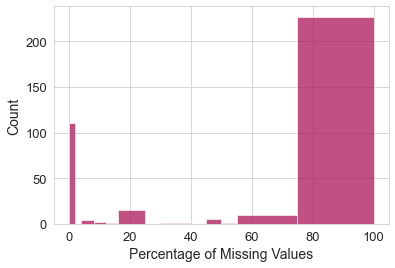

In [28]:
bins= [0, 2, 4, 8, 12, 16, 25, 30, 35, 40, 45, 50, 55, 75, 100]
ax = sns.histplot(data= missing_value_df, x= 'percent_missing' , 
                 color= sns.color_palette('rocket')[2], 
                 bins= bins)
ax.set(xlabel= 'Percentage of Missing Values')
plt.savefig('histmissing1.png', dpi=300, bbox_inches='tight')

plt.show()

## Filtering out columns with more than 50% missing values

In [29]:
missing_value_df= missing_value_df[(missing_value_df['percent_missing'] < 50 )& (missing_value_df['percent_missing'] > -1)]
nn = missing_value_df['column_name']
dff = dff[nn]
#dff.set_index('hhid')
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43297 entries, 1 to 25526
Columns: 139 entries, ipbh to labor_2
dtypes: category(115), float64(20), int64(4)
memory usage: 13.1 MB


In [30]:
dff.shape

(43297, 139)

In [31]:

percent_missing = dff.isnull().sum() * 100 / len(dff)
missing_value_df = pd.DataFrame({'column_name': dff.columns,
                                     'percent_missing': percent_missing})
print(missing_value_df)


                 column_name  percent_missing
ipbh                    ipbh         0.030025
a4                        a4         0.000000
v18j                    v18j         0.000000
cond_aseg          cond_aseg        22.020001
v18g                    v18g         0.000000
h3a                      h3a         0.000000
itbh                    itbh         0.030025
a11                      a11        33.690556
efi                      efi         0.000000
d_zon_ipcn        d_zon_ipcn         0.030025
v4                        v4         0.000000
v6                        v6         0.000000
v8                        v8         0.000000
linea                  linea         0.000000
tnmh                    tnmh         0.030025
ipnh                    ipnh         0.030025
b8                        b8        17.398434
cuestionario    cuestionario         0.000000
v14b                    v14b         0.755249
isbh                    isbh         0.030025
ult_aaprob        ult_aaprob      

In [32]:
missing_value_df

,column_name,percent_missing
ipbh,ipbh,0.030025
a4,a4,0.000000
v18j,v18j,0.000000
cond_aseg,cond_aseg,22.020001
v18g,v18g,0.000000
h3a,h3a,0.000000
itbh,itbh,0.030025
a11,a11,33.690556
efi,efi,0.000000
d_zon_ipcn,d_zon_ipcn,0.030025


In [33]:
sns.set_style('whitegrid')
sns.color_palette('rocket')
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13) 

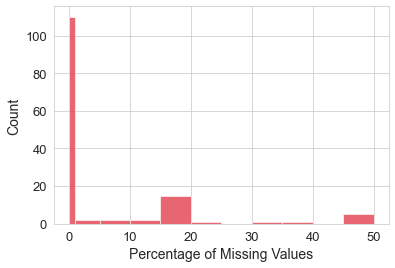

In [34]:
bins= [ 0, 1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
ax = sns.histplot(data= missing_value_df, x= 'percent_missing' , 
                 color= sns.color_palette('rocket')[3],
                 bins = bins)
ax.set(xlabel= 'Percentage of Missing Values')
plt.savefig('histmissing2.png', dpi=300, bbox_inches='tight')

plt.show()

## Imputation of Missing Values

### For categorical columns

In [35]:
dff.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43297 entries, 1 to 25526
Data columns (total 139 columns):
 #    Column         Dtype   
---   ------         -----   
 0    ipbh           float64 
 1    a4             category
 2    v18j           category
 3    cond_aseg      category
 4    v18g           category
 5    h3a            category
 6    itbh           float64 
 7    a11            category
 8    efi            category
 9    d_zon_ipcn     category
 10   v4             category
 11   v6             category
 12   v8             category
 13   linea          float64 
 14   tnmh           float64 
 15   ipnh           float64 
 16   b8             category
 17   cuestionario   float64 
 18   v14b           category
 19   isbh           float64 
 20   ult_aaprob     category
 21   h6a            category
 22   v13a           category
 23   hogar          float64 
 24   calviv         category
 25   otroactautcon  category
 26   v7b            category
 27   irph          

In [36]:
it_impute_cat= dff.select_dtypes(include='category')
it_impute_cat.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43297 entries, 1 to 25526
Data columns (total 115 columns):
 #    Column         Dtype   
---   ------         -----   
 0    a4             category
 1    v18j           category
 2    cond_aseg      category
 3    v18g           category
 4    h3a            category
 5    a11            category
 6    efi            category
 7    d_zon_ipcn     category
 8    v4             category
 9    v6             category
 10   v8             category
 11   b8             category
 12   v14b           category
 13   ult_aaprob     category
 14   h6a            category
 15   v13a           category
 16   calviv         category
 17   otroactautcon  category
 18   v7b            category
 19   h9f            category
 20   b7a            category
 21   a13            category
 22   actcomvol      category
 23   lp             category
 24   h9e            category
 25   b7k            category
 26   h9h            category
 27   h9i           

In [37]:
preserve_column_index_cat= it_impute_cat.columns

In [38]:
imp_mean_cat = IterativeImputer(max_iter=12, n_nearest_features= 10, initial_strategy= 'most_frequent')
imp_mean_cat.fit(it_impute_cat)
it_impute_cat = pd.DataFrame(imp_mean_cat.transform(it_impute_cat), columns= [it_impute_cat.columns])

In [39]:
it_impute_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43297 entries, 0 to 43296
Columns: 115 entries, ('a4',) to ('actprimautcon',)
dtypes: float64(115)
memory usage: 38.0 MB


### For numerical values

In [40]:
it_impute_num= (dff.select_dtypes(include='float64')).drop(['cuestionario','linea', 'hhid', 'factor', 'hogar'], axis=1)
it_impute_num.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43297 entries, 1 to 25526
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ipbh    43284 non-null  float64
 1   itbh    43284 non-null  float64
 2   tnmh    43284 non-null  float64
 3   ipnh    43284 non-null  float64
 4   isbh    43284 non-null  float64
 5   irph    43284 non-null  float64
 6   tamviv  43297 non-null  float64
 7   isnh    43284 non-null  float64
 8   ithn    43284 non-null  float64
 9   ipcn    43284 non-null  float64
 10  ipcb    43284 non-null  float64
 11  itnh    43284 non-null  float64
 12  ithb    43284 non-null  float64
 13  a5      43297 non-null  float64
 14  ttmh    43284 non-null  float64
dtypes: float64(15)
memory usage: 5.3 MB


In [41]:
it_impute_num

,ipbh,itbh,tnmh,ipnh,isbh,irph,tamviv,isnh,ithn,ipcn,ipcb,itnh,ithb,a5,ttmh
1,33205.000000,33205.000000,0.0,33205.000000,0.000000,0.0,3.0,0.000000,173205.000000,57735.000000,57735.000000,33205.000000,173205.000000,15.0,140000.000000
16,130219.995975,130219.995975,0.0,130219.995975,0.000000,0.0,2.0,0.000000,198553.329309,99276.664654,99276.664654,130219.995975,198553.329309,14.0,68333.333333
19,159384.000000,159384.000000,0.0,159384.000000,0.000000,0.0,3.0,0.000000,184384.000000,61461.333333,61461.333333,159384.000000,184384.000000,16.0,25000.000000
21,164077.194929,251711.829784,0.0,164077.194929,87634.634855,0.0,2.0,87634.634855,276711.829784,138355.914892,138355.914892,251711.829784,276711.829784,17.0,25000.000000
24,379808.321595,379808.321595,0.0,349955.387518,0.000000,0.0,3.0,0.000000,349955.387518,116651.795839,126602.773865,349955.387518,379808.321595,12.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25498,0.000000,0.000000,0.0,0.000000,0.000000,0.0,6.0,0.000000,190833.333333,31805.555556,31805.555556,0.000000,190833.333333,15.0,190833.333333
25499,0.000000,0.000000,0.0,0.000000,0.000000,0.0,6.0,0.000000,190833.333333,31805.555556,31805.555556,0.000000,190833.333333,12.0,190833.333333
25505,0.000000,0.000000,0.0,0.000000,0.000000,0.0,4.0,0.000000,135000.000000,33750.000000,33750.000000,0.000000,135000.000000,14.0,135000.000000
25512,351125.000000,351125.000000,0.0,329421.500000,0.000000,0.0,5.0,0.000000,329421.500000,65884.300000,70225.000000,329421.500000,351125.000000,13.0,0.000000


In [42]:
preserve_column_index_num= set(it_impute_num.columns)


In [43]:
imp_mean_num = IterativeImputer(max_iter=10, n_nearest_features= 2, initial_strategy= 'median')
imp_mean_num.fit(it_impute_num)
it_impute_num = pd.DataFrame(imp_mean_num.transform(it_impute_num), columns= preserve_column_index_num)

/Users/rmurillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [44]:
it_impute_num.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43297 entries, 0 to 43296
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ttmh    43297 non-null  float64
 1   ipcn    43297 non-null  float64
 2   ipbh    43297 non-null  float64
 3   tnmh    43297 non-null  float64
 4   itnh    43297 non-null  float64
 5   itbh    43297 non-null  float64
 6   irph    43297 non-null  float64
 7   tamviv  43297 non-null  float64
 8   ipcb    43297 non-null  float64
 9   ipnh    43297 non-null  float64
 10  ithn    43297 non-null  float64
 11  ithb    43297 non-null  float64
 12  a5      43297 non-null  float64
 13  isbh    43297 non-null  float64
 14  isnh    43297 non-null  float64
dtypes: float64(15)
memory usage: 5.0 MB


In [45]:
print(preserve_column_index_cat)

Index(['a4', 'v18j', 'cond_aseg', 'v18g', 'h3a', 'a11', 'efi', 'd_zon_ipcn',
       'v4', 'v6',
       ...
       'b3', 'h1b', 'nivinst', 'q_reg_ipcn', 'cba', 'h1c', 'h6b', 'h9a', 'h9k',
       'actprimautcon'],
      dtype='object', length=115)


In [46]:
a= set(preserve_column_index_cat)
b= set(preserve_column_index_num)
c = set(dff['hhid'])


In [47]:
dfff= dff


In [48]:
for i in a:
    for j in b:
    
            dfff[i]= it_impute_cat[i]
            dfff[j] = it_impute_num[j]
            
for i in a: 
            dfff[i] = dfff[i].astype('category')

In [49]:
example = dfff
percent_missing = example.isnull().sum() * 100 / len(example)
missing_value_example = pd.DataFrame({'column_name': dfff.columns,
                                     'percent_missing': percent_missing})
missing_value_example

,column_name,percent_missing
ipbh,ipbh,0.0
a4,a4,0.0
v18j,v18j,0.0
cond_aseg,cond_aseg,0.0
v18g,v18g,0.0
h3a,h3a,0.0
itbh,itbh,0.0
a11,a11,0.0
efi,efi,0.0
d_zon_ipcn,d_zon_ipcn,0.0


In [50]:

x = (pd.DataFrame(dfff.drop(['hhid', 'avancemos', 'hhid', 'labor_1', 'labor_2'], axis= 1)))
x_cols= (dfff.drop(['hhid', 'avancemos', 'hhid', 'labor_1', 'labor_2'], axis= 1)).columns
t = np.array(dfff['avancemos'])
y1= dfff['labor_1']
y2= dfff['labor_2']
x.info(verbose= True)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 43297 entries, 1 to 25526
Data columns (total 135 columns):
 #    Column         Dtype   
---   ------         -----   
 0    ipbh           float64 
 1    a4             category
 2    v18j           category
 3    cond_aseg      category
 4    v18g           category
 5    h3a            category
 6    itbh           float64 
 7    a11            category
 8    efi            category
 9    d_zon_ipcn     category
 10   v4             category
 11   v6             category
 12   v8             category
 13   linea          float64 
 14   tnmh           float64 
 15   ipnh           float64 
 16   b8             category
 17   cuestionario   float64 
 18   v14b           category
 19   isbh           float64 
 20   ult_aaprob     category
 21   h6a            category
 22   v13a           category
 23   hogar          float64 
 24   calviv         category
 25   otroactautcon  category
 26   v7b            category
 27   irph          

In [51]:
dfff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43297 entries, 1 to 25526
Columns: 139 entries, ipbh to labor_2
dtypes: category(115), float64(20), int64(4)
memory usage: 19.5 MB


In [52]:
numeric_features= (dfff.drop(['hhid', 'cuestionario', 'factor', 'linea'], axis=1).select_dtypes('float64', 'int64').columns)
0categorical_features = (dfff.select_dtypes('category').columns)


SyntaxError: invalid syntax (<ipython-input-52-a27adfe64cdb>, line 2)

In [ ]:
numeric_features

In [ ]:
categorical_features

In [ ]:
num_transformer = StandardScaler()

cat_transformer= OneHotEncoder(handle_unknown= 'ignore', sparse= False)

preprocess = ColumnTransformer(
                transformers=[
                    ('num', num_transformer, numeric_features), 
                    ('cat', cat_transformer, categorical_features),
                    
                ], remainder= 'passthrough'
            )

ex= preprocess.fit_transform(x)

In [ ]:
cat_transformer.fit_transform(x[['v8']])

In [ ]:
ex = pd.DataFrame(ex)
ex.info()

In [ ]:
ct = ColumnTransformer([('ohe', OneHotEncoder(), [])], remainder= 'passthrough')
#ohe.fit(x)
#x= ohe.transform(x).toarray()
#x.shape

dataset = np.array(ct.fit_transform(x), dtype = 'object')

In [ ]:
dataset[43000, 1]

### Ordering variables for hot one encoding

Categ. Ordinal

In [ ]:
catvarord= ['V7A', 'V7B', 'V7C', 'EFI', 'CalViv', 'V9', 'HacApo', 'V10', 'SerBa', 'V21A', 'A9C', 'NivInst', 'A20A']

Categ. No Ordinal

In [ ]:
catvarnonord= ['REGION', 'ZONA', 'V1','V2A' ,'V3', 'V4', 'V6', 'V11', 'V12','V13A', 'V13B', 'V15', 'V16','V17A','V19B','A4', 'A6', 'LugNac', 'CondMig', 'RegNac', 'RegResAnt', 'A8A', 'A8B', 'A10A', 'A10B', 'A10C', 'A11', 'A12', 'A13', 'A14', 'A15A', 'A15B', 'ForReg', 'A16B', 'A17', 'A18A', 'A18B', 'A18C', 'ForNoReg', 'A21', 'A22A', 'A22B'  , 'B5', 'B6', 'B8' ]

Continua

In [ ]:
continiousvar= ['RENT', 'V8','V9', 'V14A1', 'V18A1','V18B1', 'V18F1', 'V18G1',  'V18Q1', 'V18I1', 'V18J1', 'V18K1', 'V18L1' , 'V18M1','TamHog', 'TamViv', 'A5', 'A9B', 'Escolari', 'REZ_ESC', 'A19B' ]

Dummy

In [ ]:
dum= ['V5', 'V6A', 'HacDor', 'HacApo', 'V14A','V14B', 'V17B1', 'V17B2', 'V17B3', 'V17B4','V17B5', 'V17B6', 'V18A', 'V18B', 'V18C', 'V18D', 'V18E', 'V18F' , 'V18G','V18Q', 'V18H', 'V18I', 'V18J','V18K', 'V18L', 'V18M' , 'V18O', 'V18P', 'V18R', 'V19' , 'V21', 'R4B', 'A9A' , 'A19A', 'A24A', 'A24B', 'A24C', 'A24D', 'A24E', 'A23', 'B1', 'B2', 'B3', 'B4', 'B7A', 'B7B', 'B7C', 'B7D', 'B7E', 'B7G', 'B7H', 'B7I', 'B7J', 'B7K', 'B7L']

## Ordinal Encoding

In [ ]:
df.keys()

In [ ]:
ohe= OneHotEncoder(handle_unknown='ignore')

In [ ]:
enc = OrdinalEncoder(categories='auto')


In [ ]:
ct = make_column_transformer(
    (ohe, ['V5', 'V6A', 'HacDor', 'HacApo', 'V14A','V14B', 'V17B1', 'V17B2', 'V17B3', 'V17B4','V17B5', 'V17B6', 'V18A', 'V18B', 'V18C', 'V18D', 'V18E', 'V18F' , 'V18G','V18Q', 'V18H', 'V18I', 'V18J','V18K', 'V18L', 'V18M' , 'V18O', 'V18P', 'V18R', 'V19' , 'V21', 'R4B', 'A9A' , 'A19A', 'A24A', 'A24B', 'A24C', 'A24D', 'A24E', 'A23', 'B1', 'B2', 'B3', 'B4', 'B7A', 'B7B', 'B7C', 'B7D', 'B7E', 'B7G', 'B7H', 'B7I', 'B7J', 'B7K', 'B7L']), 
    (enc, ['REGION', 'ZONA', 'V1','V2A' ,'V3', 'V4', 'V6', 'V11', 'V12','V13A', 'V13B', 'V15', 'V16','V17A','V19B','A4', 'A6', 'LugNac', 'CondMig', 'RegNac', 'RegResAnt', 'A8A', 'A8B', 'A10A', 'A10B', 'A10C', 'A11', 'A12', 'A13', 'A14', 'A15A', 'A15B', 'ForReg', 'A16B', 'A17', 'A18A', 'A18B', 'A18C', 'ForNoReg', 'A21', 'A22A', 'A22B'  , 'B5', 'B6', 'B8']), 
    remainder='passthrough')

In [ ]:
ct.fit_transform(df)

## One Hot Encoding

## Label Encoder

Used for the labels that will acts as the ouput of the model. 

In [ ]:
enc_df = df{catvarord}.apply

In [ ]:
enc_df

In [ ]:
#df.to_csv('C:/Users/ricar/Desktop/df.csv')